In [ ]:
# %%

# IMPORT
# ==============================================================================================
import numpy as np
import cv2
import skimage.measure as measure
from matplotlib import pyplot as plt

In [ ]:
# %%

# LOAD IMAGE
# ==============================================================================================
file_name = 'Inputs/Sample image.png'
im = cv2.imread(file_name)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [ ]:
# %%

# IMAGE DIMENSION
# ==============================================================================================
print(f'Number of pixels in X direction: {im.shape[1]}')
print(f'Number of pixels in Y direction: {im.shape[0]}')

Number of pixels in X direction: 660
Number of pixels in Y direction: 495


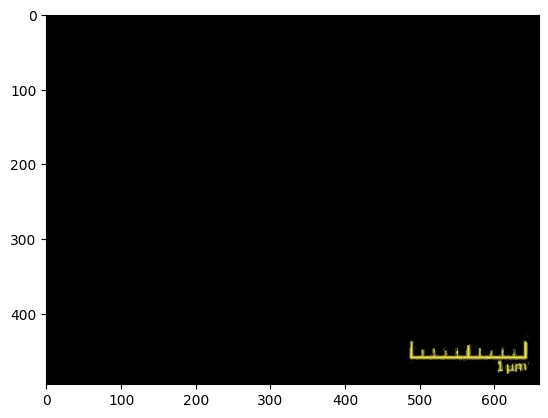

In [ ]:
# %%

# PIXEL SIZE
# ==============================================================================================
lowers = np.array([0, 0, 75])
highers = np.array([255, 255, 255])
im_hls = cv2.cvtColor(im, cv2.COLOR_RGB2HLS_FULL)
new_mask = cv2.inRange(im_hls, lowers, highers)
new_im = cv2.bitwise_and(im, im, mask=new_mask)
plt.imshow(new_im)

In [ ]:
# %%

new_im_2 = cv2.cvtColor(new_im, cv2.COLOR_RGB2GRAY)
new_mask_2 = (new_im_2 >= 120) * 1
new_label_2 = measure.label(new_mask_2)
props_tab = measure.regionprops_table(new_label_2, properties=('centroid',
                                                'area',
                                                'perimeter',
                                                'axis_major_length',
                                                'axis_minor_length',
                                                ))

In [ ]:
# %%

ruler_in_pixel = props_tab['axis_major_length'].max()
pixel_size = 1000 / ruler_in_pixel
print('Ruler length = 1 micron = 1000 nm')
print(f'Ruler in pixel = {ruler_in_pixel}')
print(f'Pixel size = Ruler length / Ruler in pixel = {pixel_size} nm')

Ruler length = 1 micron = 1000 nm
Ruler in pixel = 201.6471888386392
Pixel size = Ruler length / Ruler in pixel = 4.959156662482478 nm


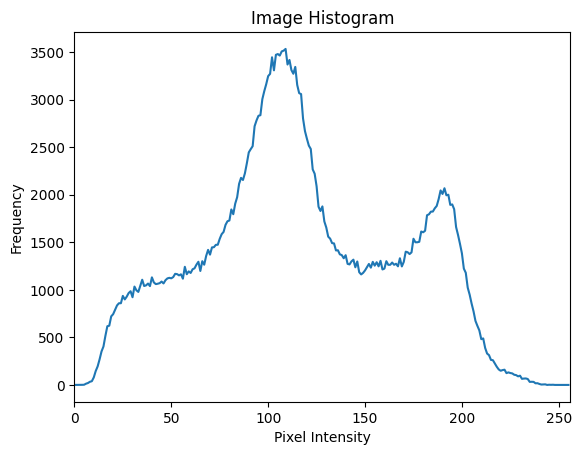

In [ ]:
# %%

# IMAGE HISTOGRAM
# ==============================================================================================
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
hist = cv2.calcHist([im_gray], [0], None, [256], [0, 256])
plt.figure()
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

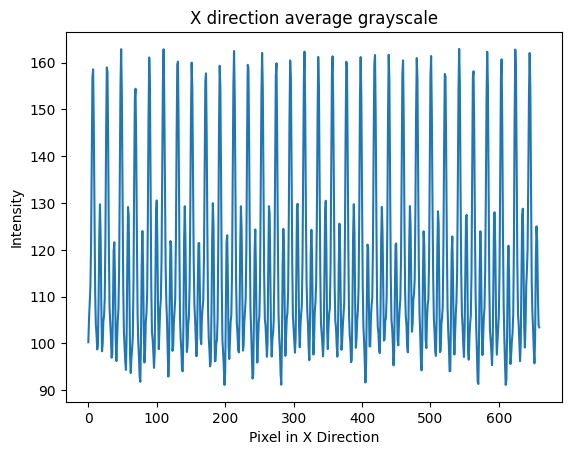

In [ ]:
# %%

# X AVERAGE INTENSITY
# ==============================================================================================
mean_x = np.mean(im_gray, axis=0)
plt.plot(mean_x)
# plt.plot(mean_x)
plt.title('X direction average grayscale')
plt.xlabel('Pixel in X Direction')
plt.ylabel('Intensity')
plt.show()

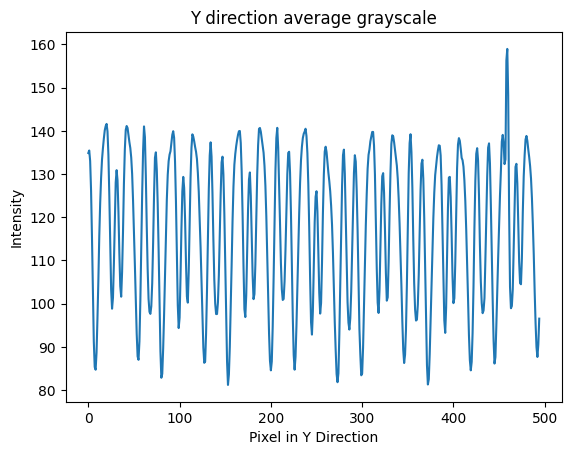

In [ ]:
# %%

# Y AVERAGE INTENSITY
# ==============================================================================================
mean_y = np.mean(im_gray, axis=1)
plt.plot(mean_y)
plt.title('Y direction average grayscale')
plt.xlabel('Pixel in Y Direction')
plt.ylabel('Intensity')
plt.show()